# Problem Statement

## From the given data predict if the patient has heart disease or not.

# Features

- 1. There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
- 2. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
- 3. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
- 4. resting_blood_pressure (type: int): resting blood pressure
- 5. chest_pain_type (type: int): chest pain type (4 values)
- 6. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
- 7. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
- 8. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
- 9. serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
- 10. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
- 11. sex (type: binary): 0: female, 1: male
- 12. age (type: int): age in years
- 13. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
- 14. exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
- 15. heart_disease_present (type: binary): heart_disease_present (0: not present, 1: present)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Loading Dataset

- We have two data sets in which patient_id is common. So we will drop patient_id from one and concatnate two datasets.

In [2]:
data1=pd.read_csv('values.csv')
pd.set_option("display.max_columns",None)
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
data2=pd.read_csv('labels.csv')
data2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
# patient_id is common in data1 and data2
data2.drop("patient_id",axis=1,inplace=True)

In [5]:
data=pd.concat([data1,data2],axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Basic Checks

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# Renaming some features

In [8]:
data.rename(columns={"slope_of_peak_exercise_st_segment":"slope"},inplace=True)
data.rename(columns={"resting_blood_pressure":"resting_bp"},inplace=True)
data.rename(columns={"fasting_blood_sugar_gt_120_mg_per_dl":"fasting_blood_sugar"},inplace=True)
data.rename(columns={"resting_ekg_results":"resting_ekg"},inplace=True)
data.rename(columns={"serum_cholesterol_mg_per_dl":"serum_cholesterol"},inplace=True)
data.rename(columns={"oldpeak_eq_st_depression":"oldpeak"},inplace=True)
data.rename(columns={"max_heart_rate_achieved":"max_heart_rate"},inplace=True)

# Exploratory Data Analysis

# Slope

- The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

In [9]:
data.slope.value_counts()

slope
1    93
2    75
3    12
Name: count, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

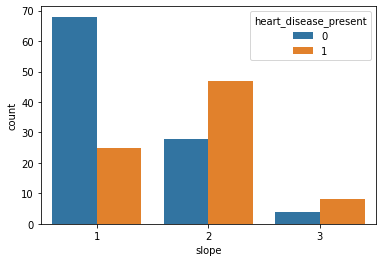

In [10]:
sns.countplot(x="slope",hue="heart_disease_present",data=data)

# Thal

- Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

In [11]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [12]:
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

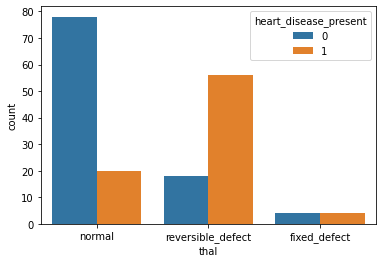

In [13]:
sns.countplot(x="thal",hue="heart_disease_present",data=data)

# Resting Blood Pressure

In [14]:
data.resting_bp.unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [15]:
data.resting_bp.value_counts()

resting_bp
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: count, dtype: int64

<AxesSubplot:xlabel='resting_bp', ylabel='count'>

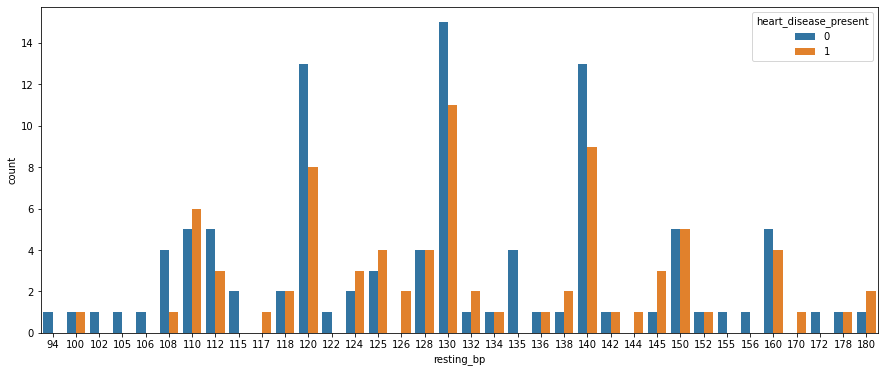

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x="resting_bp",hue="heart_disease_present",data=data)

- Patients with resting blood pressure above 110 are more likely to heart disease.

# Chest Pain Type

- Chest pain type (4 values)

In [17]:
data.chest_pain_type.unique()

array([2, 3, 4, 1], dtype=int64)

In [18]:
data.chest_pain_type.value_counts()

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

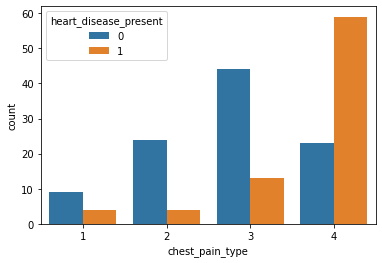

In [19]:
sns.countplot(x="chest_pain_type",hue="heart_disease_present",data=data)

- Patients with chest pain type 4 has higher rate of getting heart disease.

# Number of major blood vessels

- Number of major vessels (0-3) colored by flourosopy

In [20]:
data.num_major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

In [21]:
data.num_major_vessels.value_counts()

num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

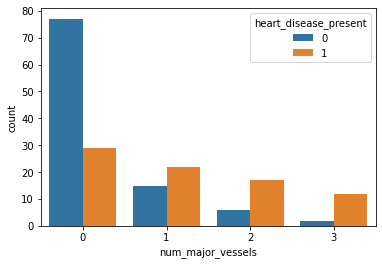

In [22]:
sns.countplot(x="num_major_vessels",hue="heart_disease_present",data=data)

# Fasting Blood Sugar

- Fasting blood sugar > 120 mg/dl

In [23]:
data.fasting_blood_sugar.unique()

array([0, 1], dtype=int64)

In [24]:
data.fasting_blood_sugar.value_counts()

fasting_blood_sugar
0    151
1     29
Name: count, dtype: int64

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

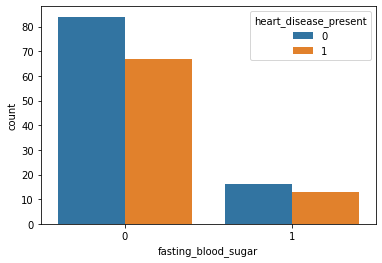

In [25]:
sns.countplot(x="fasting_blood_sugar",hue="heart_disease_present",data=data)

# Resting EKG

- Resting electrocardiographic results (values 0,1,2)

In [26]:
data.resting_ekg.unique()

array([2, 0, 1], dtype=int64)

In [27]:
data.resting_ekg.value_counts()

resting_ekg
2    94
0    85
1     1
Name: count, dtype: int64

<AxesSubplot:xlabel='resting_ekg', ylabel='count'>

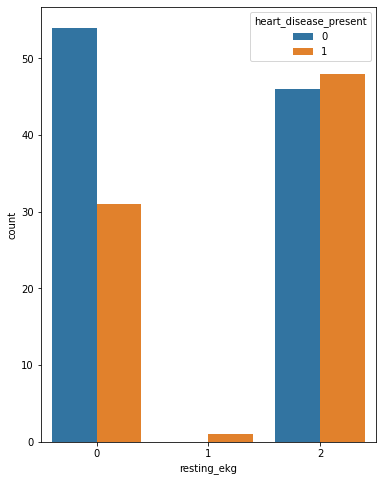

In [28]:
plt.figure(figsize=(6,8))
sns.countplot(x="resting_ekg",hue="heart_disease_present",data=data)

# Serum cholestoral

- Serum cholestoral in mg/dl

In [29]:
data.serum_cholesterol.unique()

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201], dtype=int64)

<AxesSubplot:xlabel='heart_disease_present', ylabel='serum_cholesterol'>

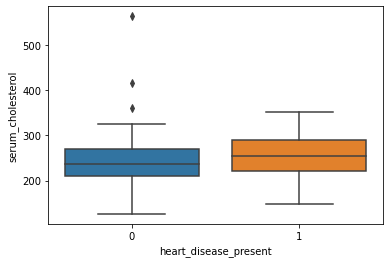

In [30]:
sns.boxplot(x="heart_disease_present", y="serum_cholesterol",data=data)

<AxesSubplot:xlabel='serum_cholesterol', ylabel='Density'>

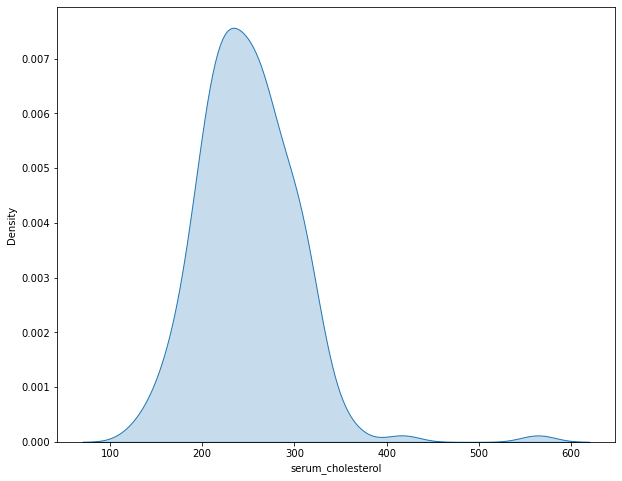

In [33]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data["serum_cholesterol"], shade=True)

# Oldpeak

- Oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

In [34]:
data.oldpeak.unique()

array([0. , 1.6, 4.2, 2.6, 0.6, 3.4, 0.4, 0.2, 3.8, 0.9, 1.4, 0.1, 0.3,
       2.3, 1.5, 3. , 2. , 1. , 3.1, 2.5, 0.8, 2.4, 1.8, 1.9, 2.8, 1.2,
       0.5, 2.2, 1.3, 1.1, 0.7, 3.2, 5.6, 6.2])

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

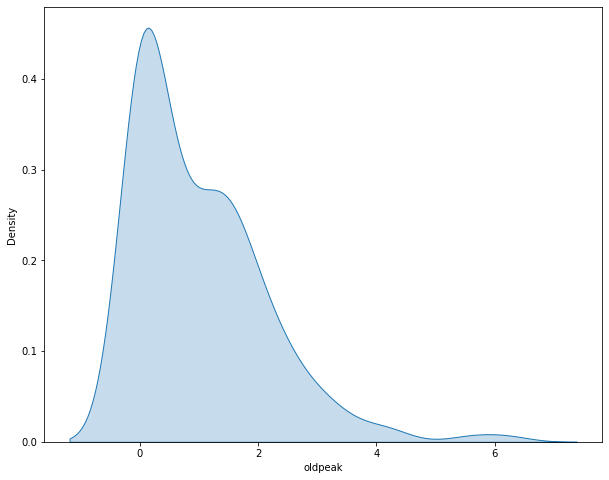

In [36]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data["oldpeak"], shade=True)

<AxesSubplot:xlabel='heart_disease_present', ylabel='oldpeak'>

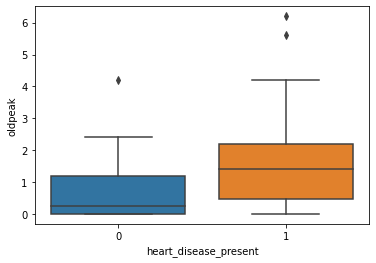

In [37]:
sns.boxplot(x="heart_disease_present", y="oldpeak",data=data)

# Sex

In [38]:
data.sex.unique()

array([1, 0], dtype=int64)

In [39]:
data.sex.value_counts()

sex
1    124
0     56
Name: count, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

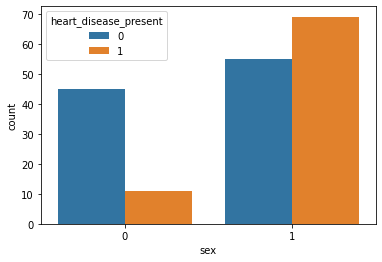

In [40]:
sns.countplot(x="sex",hue="heart_disease_present",data=data)

- Males have higher rate of getting heart disease.

# Age

In [41]:
data.age.unique()

array([45, 54, 77, 40, 59, 42, 60, 57, 50, 66, 64, 38, 29, 58, 71, 52, 67,
       70, 68, 51, 41, 65, 53, 48, 62, 74, 61, 63, 46, 43, 56, 44, 35, 55,
       49, 47, 37, 69, 39, 34], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Density'>

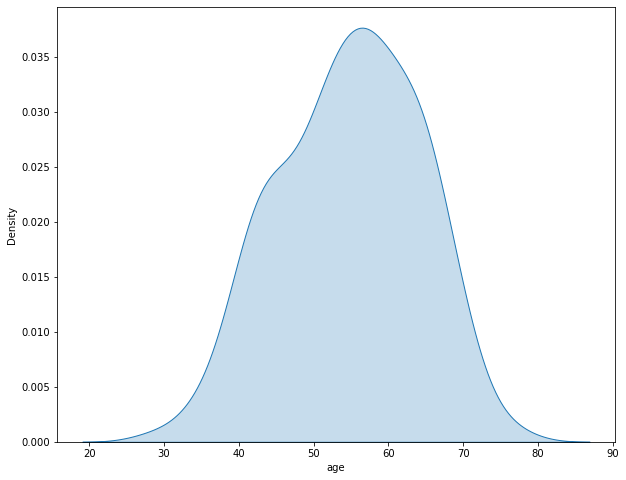

In [43]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data["age"], shade=True)

- Data for age is slightly normally distributed.

<AxesSubplot:xlabel='age', ylabel='count'>

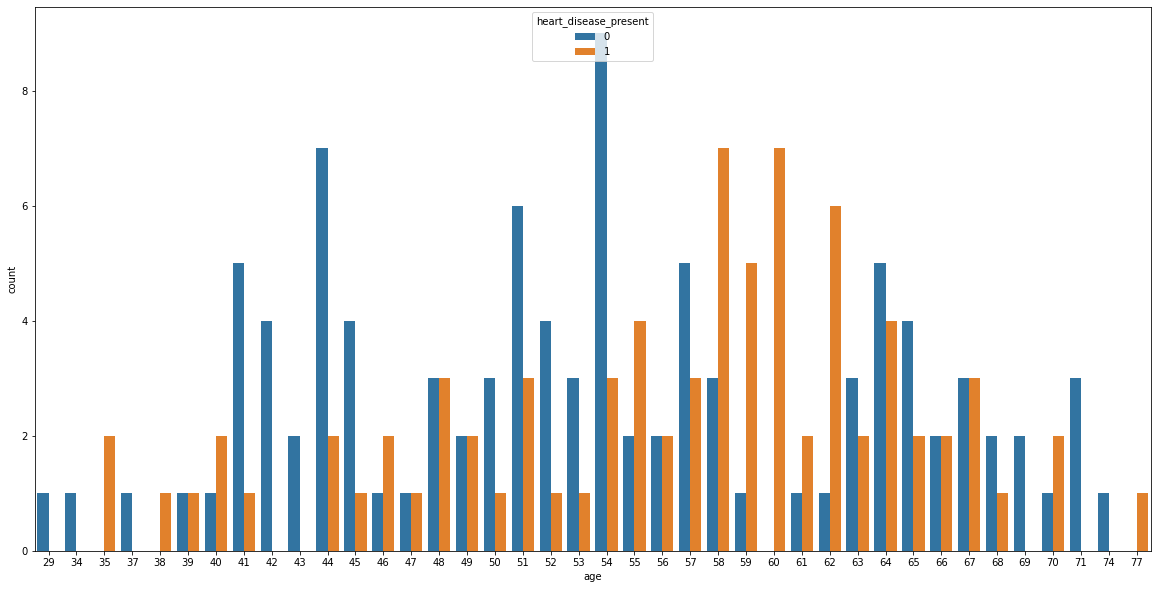

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x="age",hue="heart_disease_present",data=data)

- Patients older than 50 years are more likely to get heart disease.

# Max heart rate

- Maximum heart rate achieved (beats per minute)

In [45]:
data.max_heart_rate.unique()

array([170, 158, 162, 181, 145, 150, 157, 112, 140, 151, 178, 152, 182,
       126, 175, 144, 202, 147, 142, 138, 143, 115, 159, 184, 155, 123,
       168, 114, 154, 165, 186, 173, 163, 121, 161, 137, 172, 130, 167,
       141, 166, 125, 103, 120, 132, 169, 179,  99, 177, 160, 156, 109,
       139, 134, 113, 149, 174, 131, 148, 153, 133, 122, 105, 106, 192,
       108,  96, 171, 180, 188, 111,  97, 117], dtype=int64)

<AxesSubplot:xlabel='max_heart_rate', ylabel='Density'>

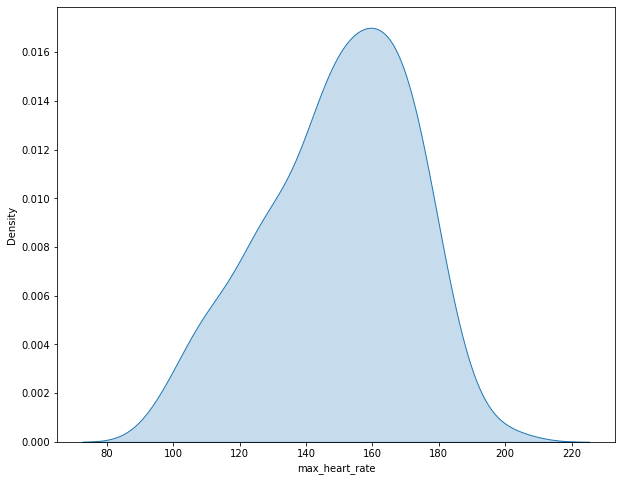

In [47]:
plt.figure(figsize=(10,8))
sns.kdeplot(data["max_heart_rate"],shade=True)

- Data for maximum heart rate is normally distributed.

<AxesSubplot:xlabel='heart_disease_present', ylabel='max_heart_rate'>

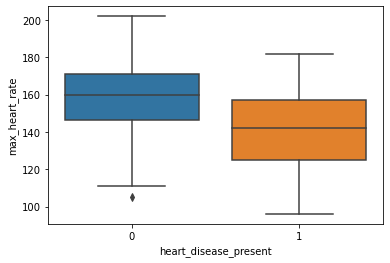

In [48]:
sns.boxplot(x="heart_disease_present", y="max_heart_rate",data=data)

# Exercise induced angina

In [49]:
data.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [50]:
data.exercise_induced_angina.value_counts()

exercise_induced_angina
0    123
1     57
Name: count, dtype: int64

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

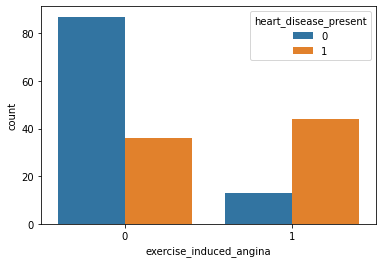

In [51]:
sns.countplot(x="exercise_induced_angina",hue="heart_disease_present",data=data)

- Pateints with execise induced angina are more likely to get heart disease.

# Target

In [52]:
data.heart_disease_present.unique()

array([0, 1], dtype=int64)

In [53]:
data.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

# Data Preprocessing

## Check for Null Values

In [54]:
data.isnull().sum()

patient_id                 0
slope                      0
thal                       0
resting_bp                 0
chest_pain_type            0
num_major_vessels          0
fasting_blood_sugar        0
resting_ekg                0
serum_cholesterol          0
oldpeak                    0
sex                        0
age                        0
max_heart_rate             0
exercise_induced_angina    0
heart_disease_present      0
dtype: int64

- No null values in the dataset.

In [55]:
data.describe()

,slope,resting_bp,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg,serum_cholesterol,oldpeak,sex,age,max_heart_rate,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


## Check for Duplicates

In [56]:
data[data.duplicated()]

,patient_id,slope,thal,resting_bp,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg,serum_cholesterol,oldpeak,sex,age,max_heart_rate,exercise_induced_angina,heart_disease_present


- No duplicate values

# Label Encoding

- LabelEncoding patiend_id and thal.

In [57]:
from sklearn.preprocessing import LabelEncoder

LC=LabelEncoder()

data['patient_id']=LC.fit_transform(data.patient_id)
data['thal']=LC.fit_transform(data.thal)

# Check for Outliers

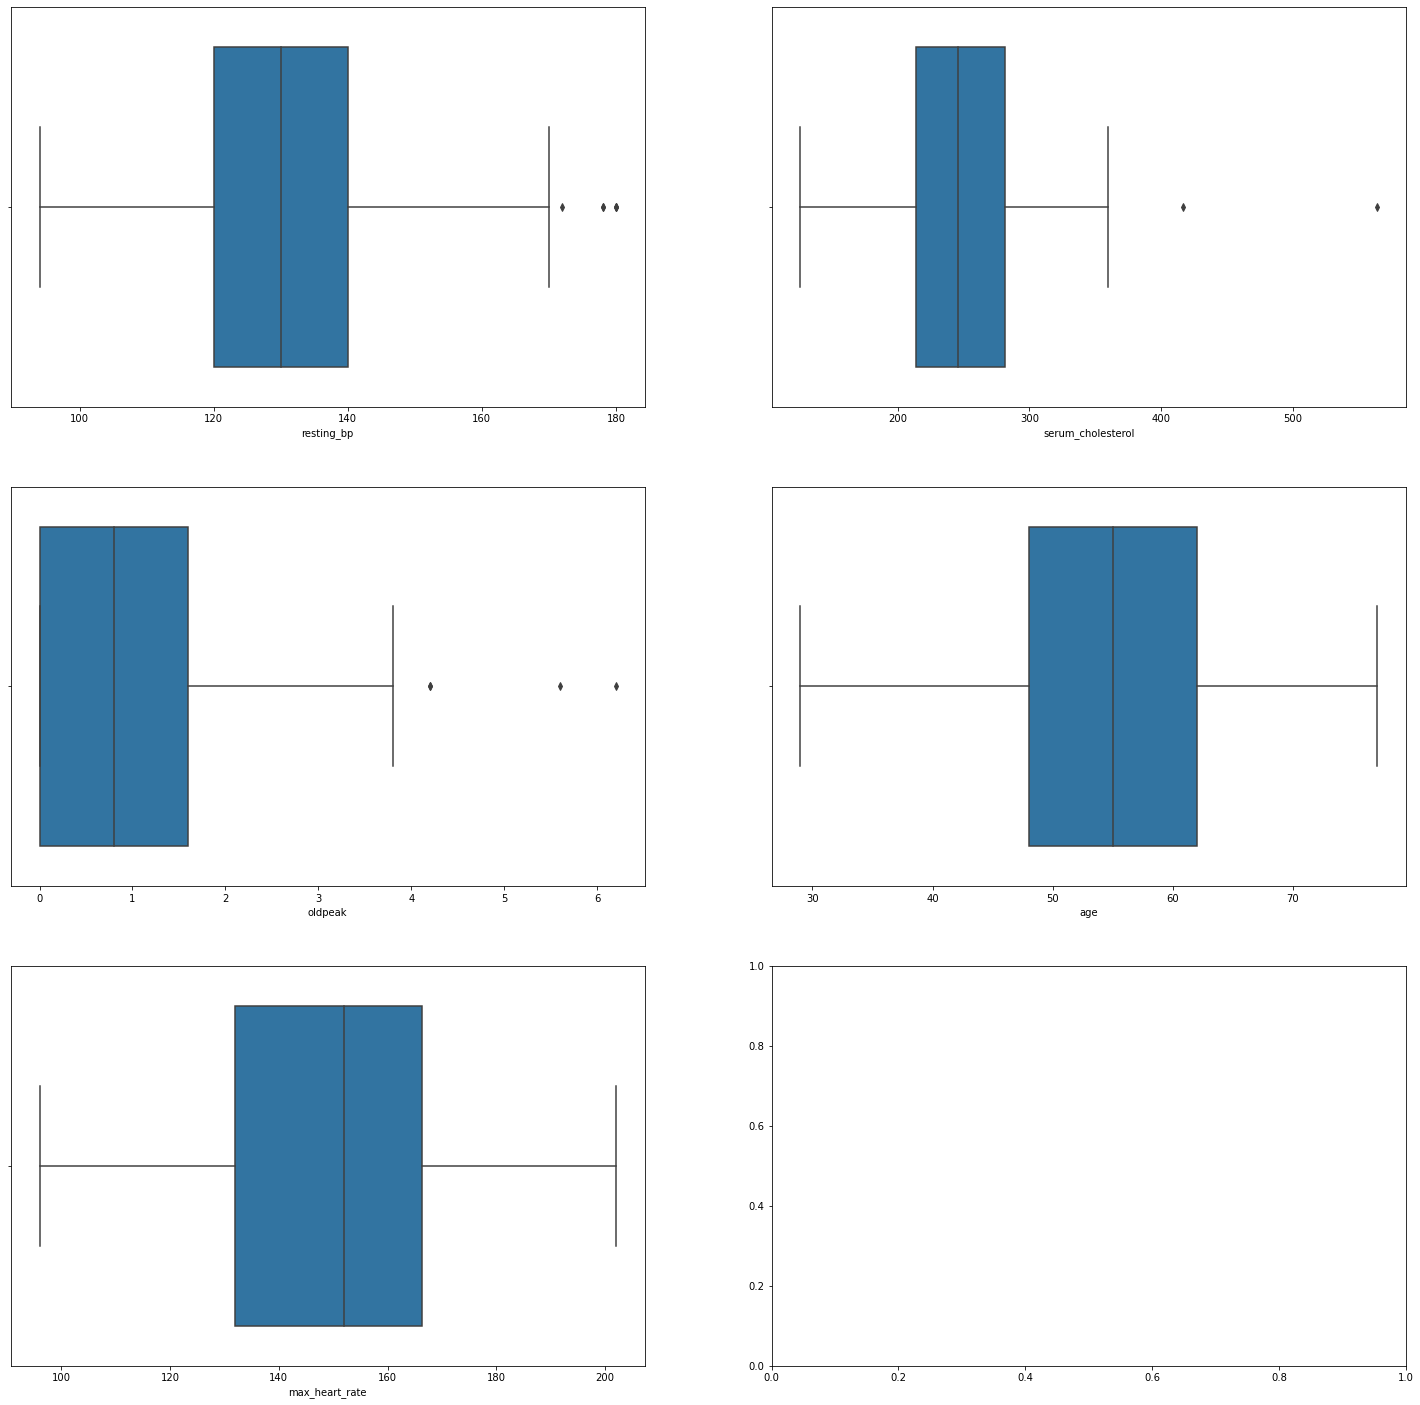

In [58]:
fig, axes = plt.subplots(3,2,figsize=(25,25))

# Checking outliers for age
sns.boxplot(x="resting_bp",ax = axes[0,0],data=data)

# Checking outliers for call duration
sns.boxplot(x="serum_cholesterol",ax = axes[0,1],data=data)

# Checking outliers for campaign contacts
sns.boxplot(x="oldpeak",ax = axes[1,0],data=data)

# Checking outliers for passed days
sns.boxplot(x="age",ax = axes[1,1],data=data)

# Checking outliers for previous contacts
sns.boxplot(x="max_heart_rate",ax = axes[2,0],data=data)

sns.set_context("paper", font_scale=2)
plt.show()

- resting_bp, serum_cholesterol & oldpeak have some number of outliers.

# Checking Correlation

In [59]:
data.corr()

,patient_id,slope,thal,resting_bp,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg,serum_cholesterol,oldpeak,sex,age,max_heart_rate,exercise_induced_angina,heart_disease_present
patient_id,1.000000,-0.021570,0.046226,0.027639,0.054496,0.001383,0.044933,0.054588,0.008115,-0.032250,0.058200,0.033113,0.036123,0.003103,-0.029908
slope,-0.021570,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.046226,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_bp,0.027639,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.054496,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.001383,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar,0.044933,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg,0.054588,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol,0.008115,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak,-0.032250,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930


<AxesSubplot:>

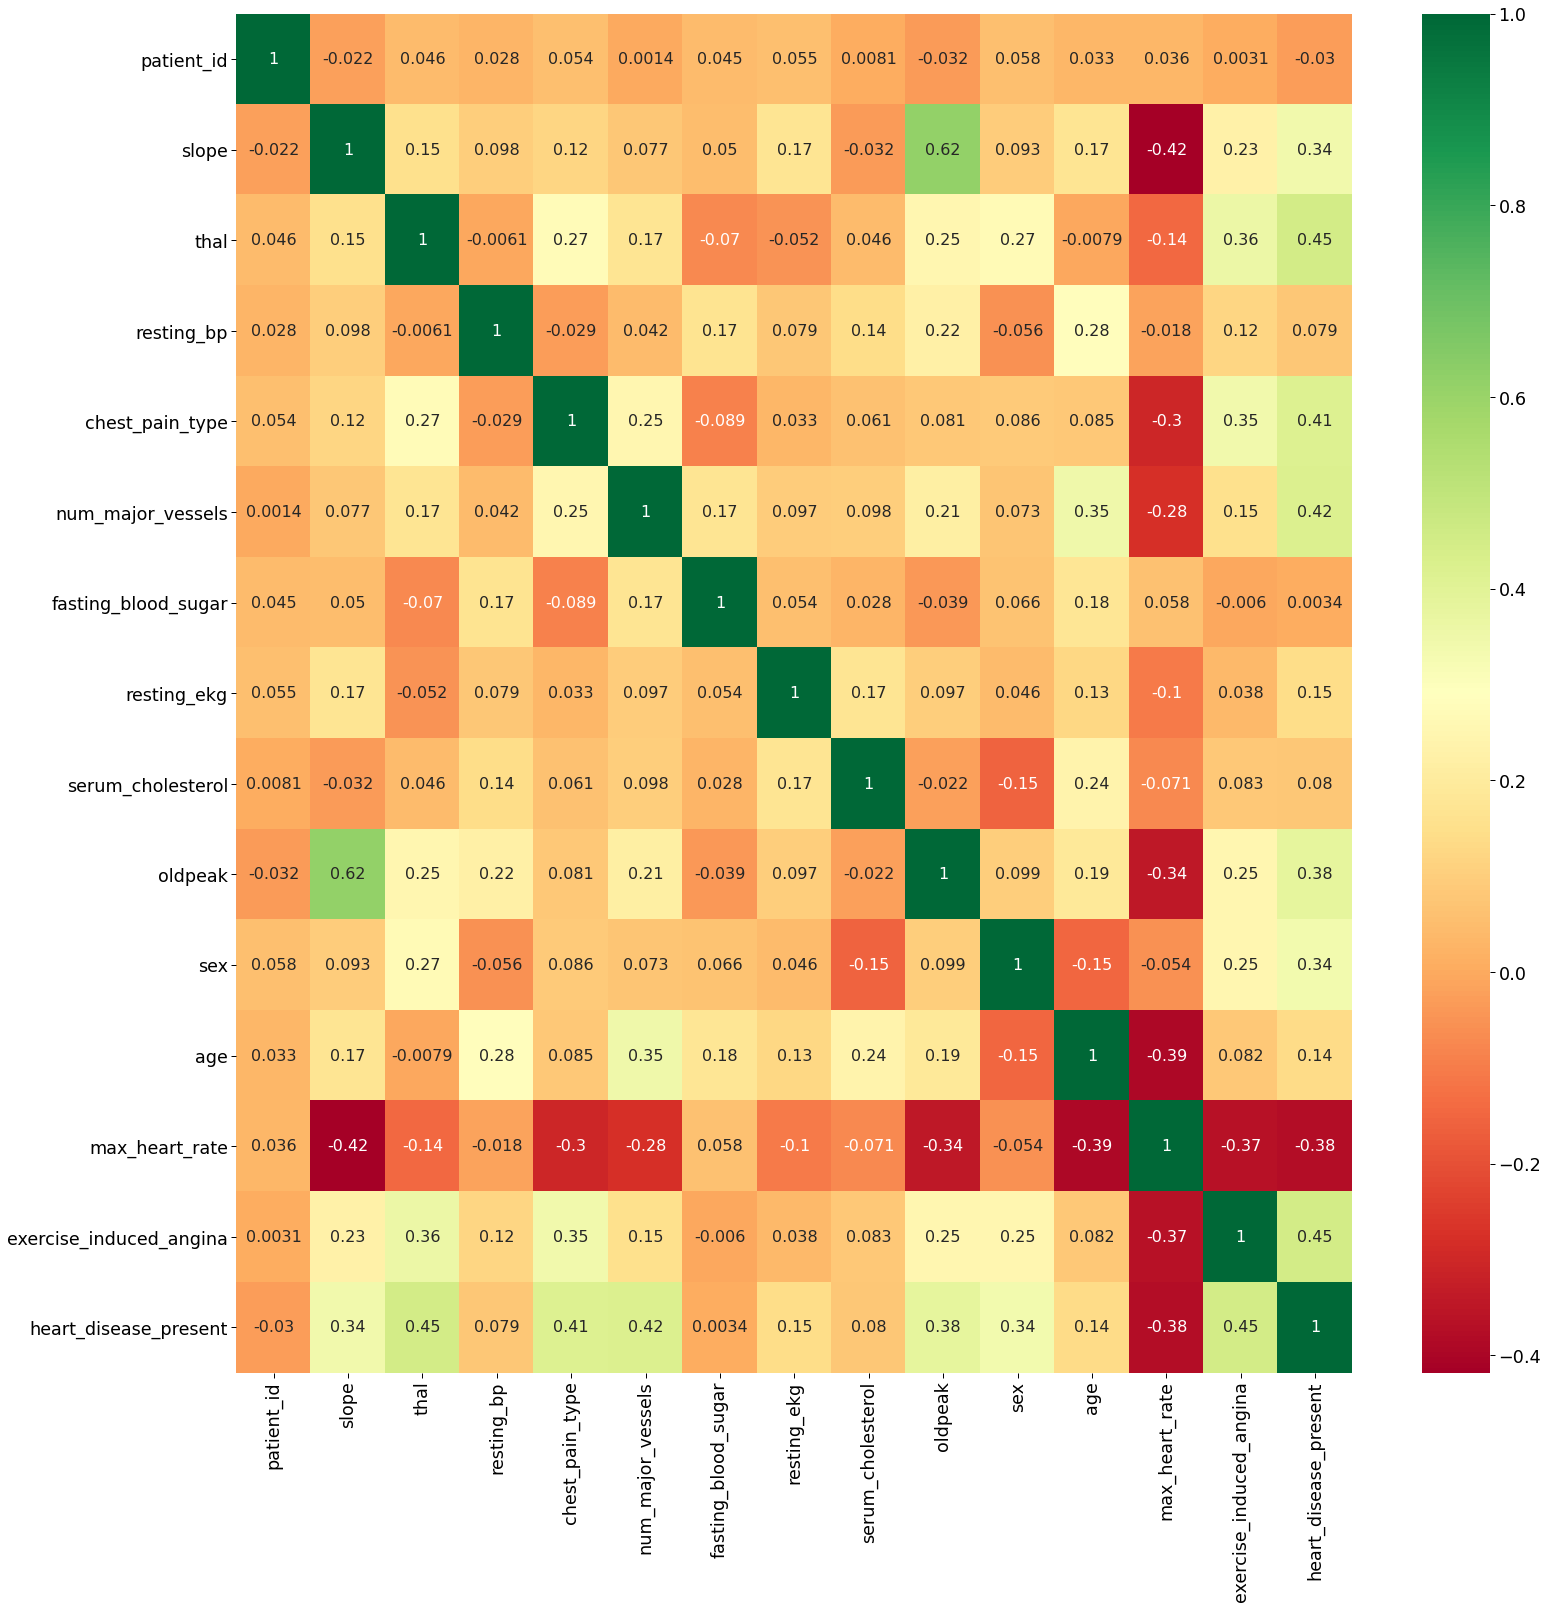

In [60]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":16})

- From the above heatmap we can observe that slope and oldpeak has moderate corellation

# Scaling Features

In [61]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data['patient_id']=scale.fit_transform(data[['patient_id']])
data['resting_bp']=scale.fit_transform(data[['resting_bp']])
data['serum_cholesterol']=scale.fit_transform(data[['serum_cholesterol']])
data['age']=scale.fit_transform(data[['age']])
data['max_heart_rate']=scale.fit_transform(data[['max_heart_rate']])

# Saving the processed data

In [62]:
data.to_excel("Heart_Disease_Pred_Processed.xlsx",index=False)

# Train Test split

In [63]:
data.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [64]:
X = data.drop(columns = ['heart_disease_present'])
y = data['heart_disease_present']

# Balancing the data using SMOTE

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [66]:
X_smote, y_smote  = smote.fit_resample(X, y)

In [67]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 100, 1: 80})
SMOTE Classes Counter({0: 100, 1: 100})


In [68]:
from sklearn.model_selection import train_test_split
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

clf.fit(X_smote_train,y_smote_train)

LogisticRegression()

In [70]:
y_pred=clf.predict(X_smote_test)

In [71]:
y_pred_prob=clf.predict_proba(X_smote_test)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [73]:
pd.crosstab(y_smote_test,y_pred) #8 Misclassifications, 6 False Negatives and 2 False Positives

col_0,0,1
heart_disease_present,,
0,29,2
1,6,23


In [74]:
cr=classification_report(y_smote_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.92      0.79      0.85        29

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote_train,y_smote_train)
    pred_i = knn.predict(X_smote_test)
    error_rate.append(np.mean(pred_i != y_smote_test)) 
    
error_rate

[0.16666666666666666,
 0.16666666666666666,
 0.11666666666666667,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.15,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333]

Text(0, 0.5, 'Error Rate')

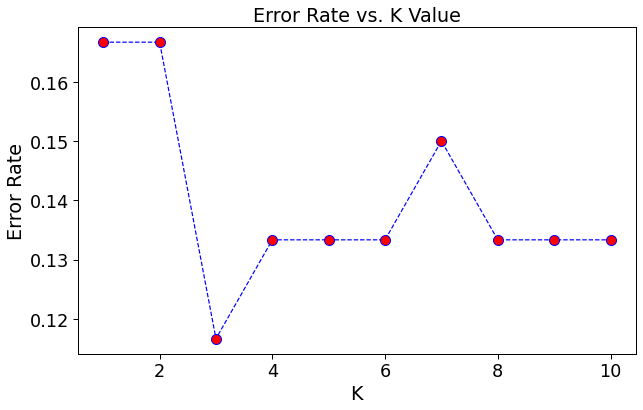

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote_train,y_smote_train)
y_pred = knn.predict(X_smote_test)

In [78]:
print("The accuracy score is : ", accuracy_score(y_smote_test,y_pred))

The accuracy score is :  0.8833333333333333


In [79]:
pd.crosstab(y_smote_test,y_pred) #7 Misclassifications, 5 False Negatives and 2 False Positives

col_0,0,1
heart_disease_present,,
0,29,2
1,5,24


In [80]:
print(classification_report(y_smote_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.92      0.83      0.87        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



# SVM

In [81]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_smote_train,y_smote_train)

SVC()

In [82]:
y_hat=svclassifier.predict(X_smote_test)

In [83]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_smote_test,y_hat)
acc

0.9

In [84]:
cm1=pd.crosstab(y_smote_test,y_hat) 
cm1 #6 Misclassifications, 5 False Negatives and 1 False Positives

col_0,0,1
heart_disease_present,,
0,30,1
1,5,24


In [85]:
print(classification_report(y_smote_test,y_hat))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.96      0.83      0.89        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')  
dt.fit(X_smote_train,y_smote_train)
y_hat_dtree=dt.predict(X_smote_test)
y_hat_dtree

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [87]:
pd.crosstab(y_smote_test,y_hat_dtree) #9 Misclassifications, 3 False Negatives and 6 False Positives

col_0,0,1
heart_disease_present,,
0,25,6
1,3,26


In [88]:
print(classification_report(y_smote_test,y_hat_dtree))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



# Bagging with base estimator as KNN

In [89]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=20)

model_bagg.fit(X_smote_train,y_smote_train)

y_hat_bagg=model_bagg.predict(X_smote_test) 

In [90]:
pd.crosstab(y_smote_test,y_hat_bagg) #7 Misclassifications, 5 False Negatives and 2 False Positives

col_0,0,1
heart_disease_present,,
0,29,2
1,5,24


In [91]:
print(classification_report(y_smote_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.92      0.83      0.87        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



# XGBoost

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smote_train, y_smote_train)
y_hat_xgb = xgb.predict(X_smote_test)

In [93]:
pd.crosstab(y_smote_test,y_hat_xgb) #6 Misclassifications, 4 False Negatives and 2 False Positives

col_0,0,1
heart_disease_present,,
0,29,2
1,4,25


In [94]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_smote_test,y_hat_xgb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.93      0.86      0.89        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_smote_train,y_smote_train)
y_hat_rf_clf = rf_clf.predict(X_smote_test)

In [96]:
pd.crosstab(y_smote_test,y_hat_rf_clf) #7 Misclassifications, 4 False Negatives and 3 False Positives

col_0,0,1
heart_disease_present,,
0,28,3
1,4,25


In [97]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_smote_test,y_hat_rf_clf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.89      0.86      0.88        29

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



# Conclusion

- In medical datasets we aim to keep false negatives as less as possible.
- Decision tree is giving 9 misclassifications with 3 false negatives, which are least false negatives among our trained models.
- Hence, we  will proceed with model trained using decision tree for further use.

# Saving Pre-Trained Model

In [99]:
import pickle
# open a file, where you ant to store the data
file = open('Heart_Disease_Prediction_Model.pkl', 'wb')

# dump information to that file
pickle.dump(dt, file)

In [101]:
pip freeze> requirements.txt

Note: you may need to restart the kernel to use updated packages.
